In [1]:
"""
例題3：Moon data - 非線形の分類問題
@author: t.imai
"""
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import tensorflow as tf
 
from tensorflow import keras
from tensorflow.keras import layers

# 入力する部分
max_epochs = 500                       # 訓練のステップの数
# 入力データのうち、訓練に使うデータの割合。0.8であれば、80%が訓練に、20％が確認に使われる。
ratio_for_training = 0.8      
filename_data = 'ex3_moondata.csv'    # データのファイル名
explanatory_start_column = 1     # 説明変数の最初の列の列番号 2列目であれば2
explanatory_end_column =2        # 説明変数の最後の列の列番号 14列目であれば14
outcome_column = 3               # 目的変数（教師データ）の列番号 15列目であれば15
# 入力はここまで

explanatory_variables = np.arange(explanatory_start_column-1, explanatory_end_column)    
outcome_variables = [outcome_column-1]               

'''
データの読み込み
'''
df = pd.read_csv(filename_data, skiprows=[0], header=None)
df1 = np.array(df.values.tolist())    

# 列でXとYを分ける。上で指定した列の番号で分割する。
x_train = df1[:, explanatory_variables]
y_train = df1[:, outcome_variables]
    
# 入力データを正規化
x_min = x_train.min(axis=0)
x_max = x_train.max(axis=0)
x_train = (x_train - x_min)/(x_max - x_min)

# モデルの構築
model = tf.keras.models.Sequential([
  keras.layers.Dense(1000, activation='relu'),
  keras.layers.Dense(1000, activation='relu'), 
  keras.layers.Dense(1000, activation='relu'),     
  keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=max_epochs, validation_split=ratio_for_training, verbose=0)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist)


         loss  accuracy  val_loss  val_accuracy  epoch
0    0.691703  0.576271  0.636399      0.821577      0
1    0.631996  0.745763  0.570224      0.834025      1
2    0.544539  0.796610  0.473060      0.813278      2
3    0.447911  0.830508  0.398420      0.825726      3
4    0.389873  0.813559  0.383717      0.821577      4
..        ...       ...       ...           ...    ...
495  0.026548  1.000000  0.439594      0.917012    495
496  0.020040  1.000000  0.440556      0.912863    496
497  0.022582  1.000000  0.443896      0.917012    497
498  0.028010  0.983051  0.451606      0.929461    498
499  0.025881  1.000000  0.461851      0.917012    499

[500 rows x 5 columns]


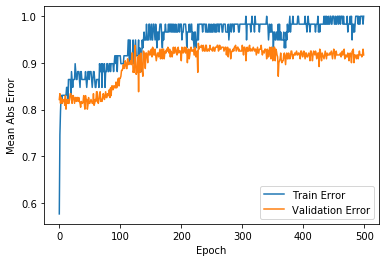

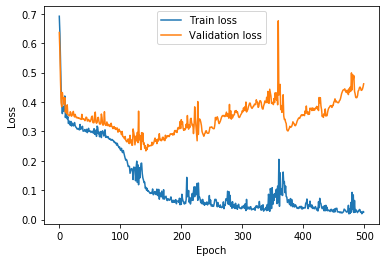

In [2]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
 
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_accuracy'],
           label='Validation Error')
  plt.legend()
 
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train loss')
  plt.plot(hist['epoch'], hist['val_loss'],
           label='Validation loss')
  plt.legend()
  plt.show()

plot_history(history)